In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchaudio
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms


C:\Users\DELL\anaconda3\envs\praveen\lib\site-packages\torchaudio\backend\utils.py:66: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
train_data=torchvision.datasets.MNIST(root='./data',download=True,train=True,transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
image1,label1=train_data[1]
print(type(image1),image1.dtype,image1.shape)


<class 'torch.Tensor'> torch.float32 torch.Size([1, 28, 28])


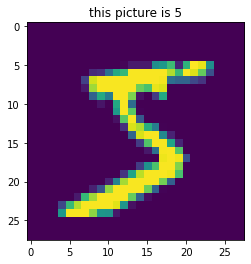

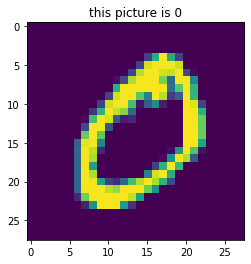

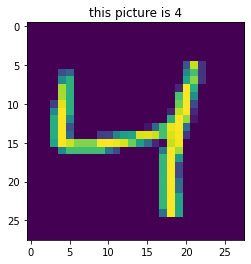

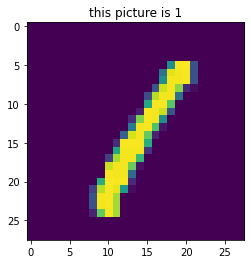

In [4]:
for i in range(4):
  image,label =train_data[i]
  plt.imshow(image.permute(1,2,0).squeeze(2))
  plt.title(f'this picture is {label}' )
  plt.show()

In [5]:
t,y=train_data[1]
t_array=np.array(t)
print(t_array.dtype,type(t_array),t_array.shape)
t_tensor=torch.tensor(t_array)
print(t_tensor.dtype,type(t_tensor),t_tensor.shape)


float32 <class 'numpy.ndarray'> (1, 28, 28)
torch.float32 <class 'torch.Tensor'> torch.Size([1, 28, 28])


In [6]:
test_data=torchvision.datasets.MNIST(root='./data',download=True,train=False,transform=transforms.ToTensor())

In [7]:
print(len(test_data))
print(len(train_data))

10000
60000


In [8]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True,)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=True)

In [9]:
# train and test data are split into batches
print(len(train_loader))
print(len(test_loader))

938
157


In [10]:
for x,y in train_loader:
  print(type(x),x.dtype,x.shape)
  print(type(y),y.dtype,y.shape)
  break

<class 'torch.Tensor'> torch.float32 torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'> torch.int64 torch.Size([64])


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [12]:
from torch.nn.modules.activation import Softmax
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.flatten=nn.Flatten()
    self.Linear=nn.Sequential(
                      nn.Linear(28*28,512),
                      nn.ReLU(),
                      nn.Linear(512,10))
                      
    
  def forward(self,x):
    x=x.to(device)
    x=self.flatten(x)
    x=self.Linear(x)
    return x
    
model=Network().to(device)
print(model)


Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
lr=0.3
loss1=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr)

In [14]:
def train(dataloader,model,loss_fn,optimizer):
  model.train()
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    pred=model(X)
    loss=loss_fn(pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%64==0:
      loss=loss.item()
      print(f'loss:{loss:>5f}')
  

In [15]:
def test(dataloader,model,loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct=0,0
  with torch.no_grad():
      for batch,(X,y) in enumerate(dataloader):
          X,y=X.to(device),y.to(device)
          pred=model(X)
          test_loss+=loss_fn(pred,y).item()
          correct+=(pred.argmax(1)==y).sum().item()
      test_loss/=num_batches
      correct/=size
      print(f'test error-{test_loss:>5f} \n Accuracy-{correct*100:>3f}%')





In [16]:
loss = nn.CrossEntropyLoss()
input = torch.tensor(5)
target = torch.empty(3, dtype=torch.long).random_(5)
#output = loss(input, target)
#output.backward()

In [17]:
len(train_loader.dataset)

60000

In [18]:
epochs=5
for epoch in range(epochs):
  print(f'Epoch-{epoch}')
  train(train_loader,model,loss1,optimizer)
  test(test_loader,model,loss1)

Epoch-0
loss:2.296094
loss:0.587150
loss:0.537309
loss:0.473057
loss:0.392177
loss:0.172349
loss:0.098417
loss:0.546449
loss:0.068928
loss:0.106443
loss:0.086137
loss:0.254069
loss:0.178528
loss:0.221882
loss:0.149155
test error-0.139581 
 Accuracy-95.580000%
Epoch-1
loss:0.146488
loss:0.091776
loss:0.104903
loss:0.048099
loss:0.196305
loss:0.102012
loss:0.144123
loss:0.178078
loss:0.029861
loss:0.190884
loss:0.070600
loss:0.058220
loss:0.043602
loss:0.047463
loss:0.115122
test error-0.108956 
 Accuracy-96.620000%
Epoch-2
loss:0.065406
loss:0.040036
loss:0.078211
loss:0.026094
loss:0.124644
loss:0.077245
loss:0.067530
loss:0.136578
loss:0.104889
loss:0.044207
loss:0.135040
loss:0.114344
loss:0.117350
loss:0.113966
loss:0.029840
test error-0.086048 
 Accuracy-97.400000%
Epoch-3
loss:0.013192
loss:0.081249
loss:0.054842
loss:0.077027
loss:0.013383
loss:0.090311
loss:0.053923
loss:0.003256
loss:0.014377
loss:0.019640
loss:0.091739
loss:0.045375
loss:0.038524
loss:0.023894
loss:0.032455
te

In [19]:
torch.save(model.state_dict(), "MNSIT.pth")
classes=['0','1','2','3','4','5','6','7','8','9']

real value 7
predicted is 7


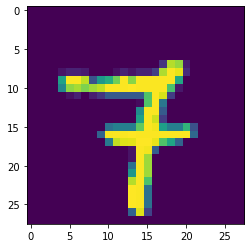

real value 3
predicted is 3


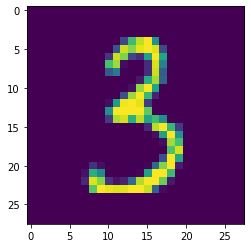

real value 2
predicted is 2


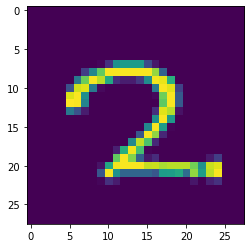

real value 9
predicted is 9


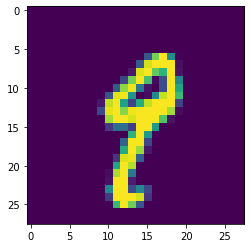

real value 7
predicted is 7


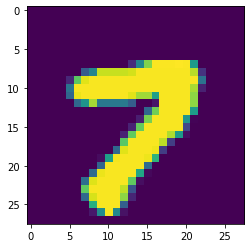

real value 7
predicted is 7


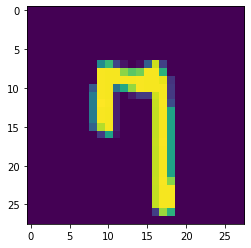

real value 6
predicted is 6


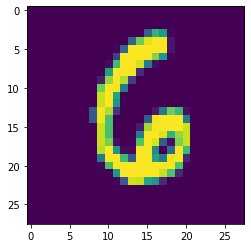

real value 2
predicted is 2


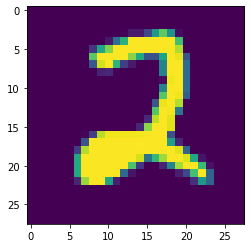

real value 7
predicted is 7


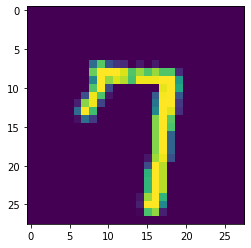

real value 8
predicted is 8


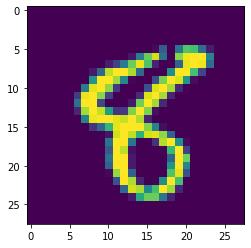

real value 4
predicted is 4


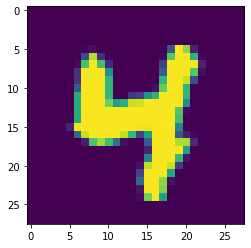

real value 7
predicted is 7


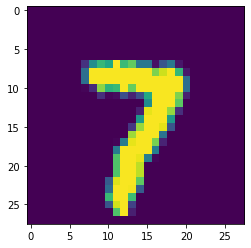

real value 3
predicted is 3


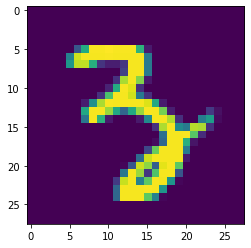

real value 6
predicted is 6


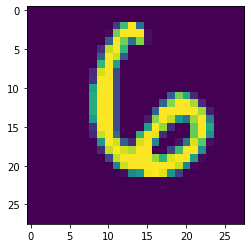

real value 1
predicted is 1


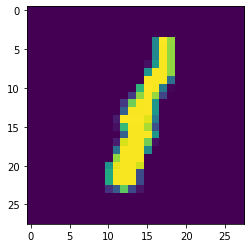

real value 3
predicted is 3


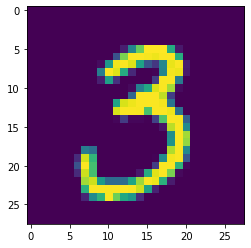

real value 6
predicted is 6


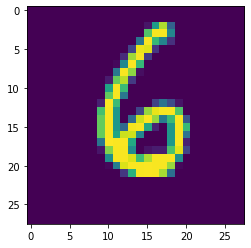

real value 9
predicted is 9


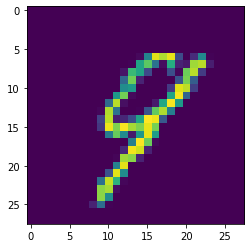

real value 3
predicted is 3


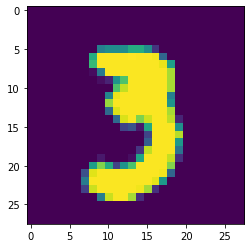

real value 1
predicted is 1


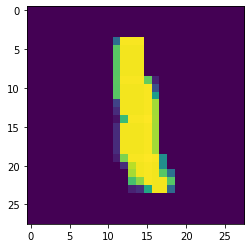

In [22]:
model.eval()
flat=nn.Flatten(0)
count=0
for i in range(75,95):
  with torch.no_grad():
    pred_x,pred_y=test_data[i]
    pred=model(pred_x)
    predicted=pred.argmax(1)
    print('real value',pred_y)
    print('predicted is',classes[predicted])
    plt.imshow(pred_x.permute(1,2,0).squeeze(2))
    plt.show()

In [23]:
test(test_loader,model,loss1)
# final accuracy is 97.82 %

test error-0.069225 
 Accuracy-97.820000%
